In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import os

def get_filenames(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            filenames.append(filename)
    return filenames

# 使用示例
folder_path = 'simu_data/'  # 替换成你的文件夹路径
file_list = get_filenames(folder_path)

file_list


['20240102140017.txt',
 '20240104122441.txt',
 '20240103184624.txt',
 '20240103131121.txt',
 '20240107150904.txt',
 '20240102180106.txt',
 '20240102003855.txt',
 '20240104124534.txt',
 '20240104190346.txt',
 '20240107175320.txt',
 '20240102133855.txt']

In [5]:
import pandas as pd
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)', '时间']]
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'simu_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}:")
    print(df.head())  # 打印每个DataFrame的前几行


Data from 202401021400:
   acc_X(g)  acc_Y(g)  acc_Z(g)                  Time
0     0.247    -0.080     0.959  2024-1-2 14:0:17:967
1     0.247    -0.092     0.951  2024-1-2 14:0:17:967
2     0.240    -0.092     0.951   2024-1-2 14:0:18:89
3     0.240    -0.089     0.957   2024-1-2 14:0:18:89
4     0.233    -0.089     0.957  2024-1-2 14:0:18:154
Data from 202401041224:
   acc_X(g)  acc_Y(g)  acc_Z(g)                   Time
0    -0.005     0.001     0.998  2024-1-4 12:24:41:944
1    -0.005     0.002     0.996   2024-1-4 12:24:42:35
2    -0.006     0.002     0.997  2024-1-4 12:24:42:155
3    -0.006     0.001     0.996  2024-1-4 12:24:42:212
4    -0.006     0.002     0.997  2024-1-4 12:24:42:338
Data from 202401031846:
   acc_X(g)  acc_Y(g)  acc_Z(g)                   Time
0    -0.013    -0.005     0.998  2024-1-3 18:46:24:575
1    -0.012    -0.005     0.997  2024-1-3 18:46:24:668
2    -0.012    -0.004     0.998  2024-1-3 18:46:24:788
3    -0.012    -0.005     0.998  2024-1-3 18:46:24:847

<Figure size 2000x500 with 0 Axes>

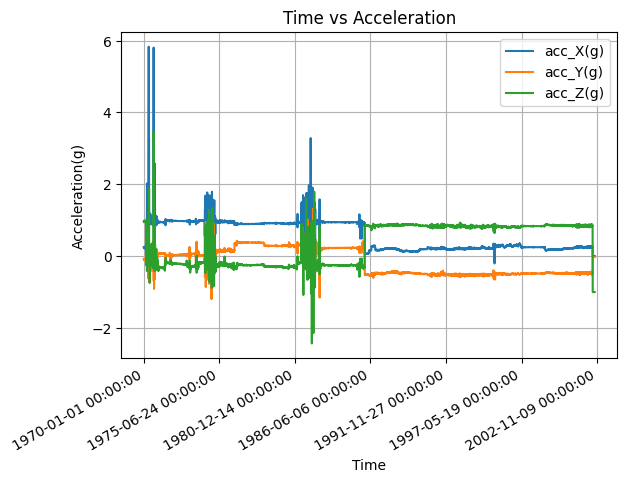

<Figure size 2000x500 with 0 Axes>

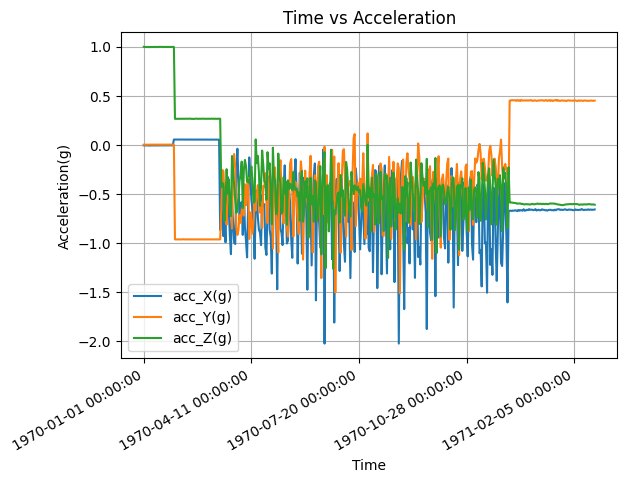

<Figure size 2000x500 with 0 Axes>

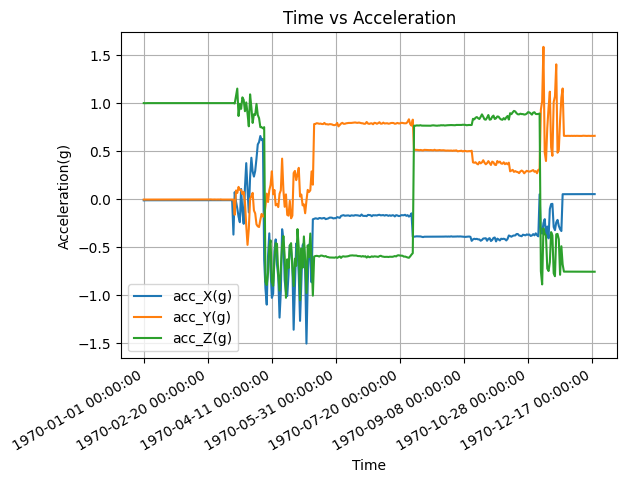

<Figure size 2000x500 with 0 Axes>

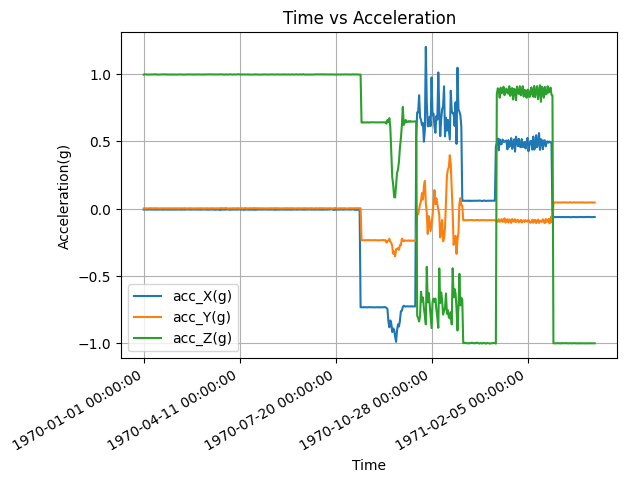

<Figure size 2000x500 with 0 Axes>

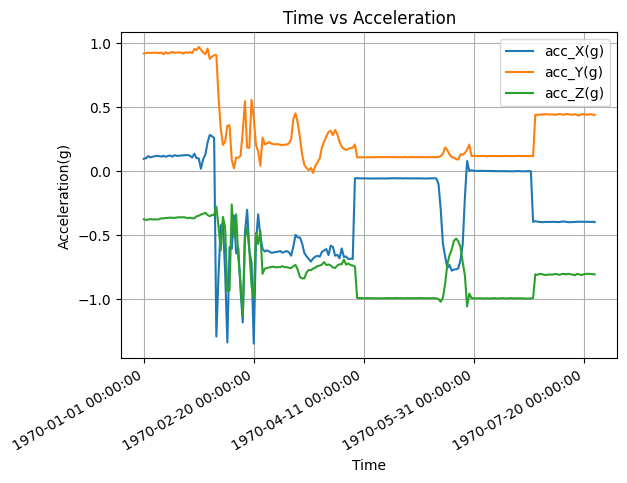

<Figure size 2000x500 with 0 Axes>

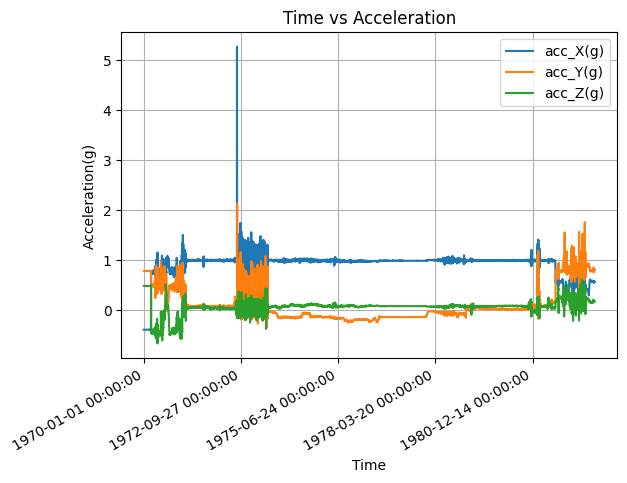

<Figure size 2000x500 with 0 Axes>

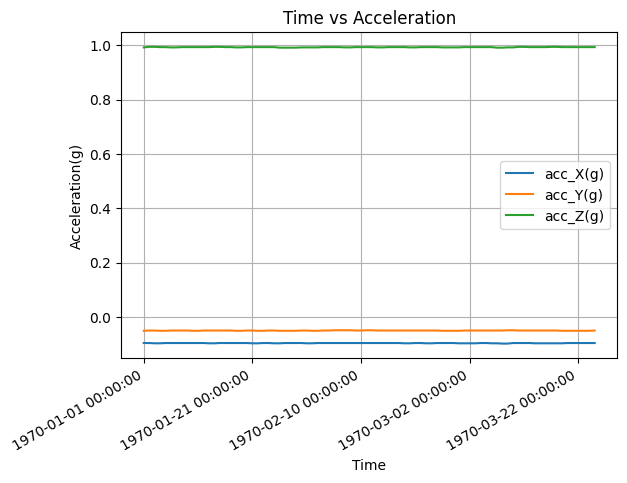

<Figure size 2000x500 with 0 Axes>

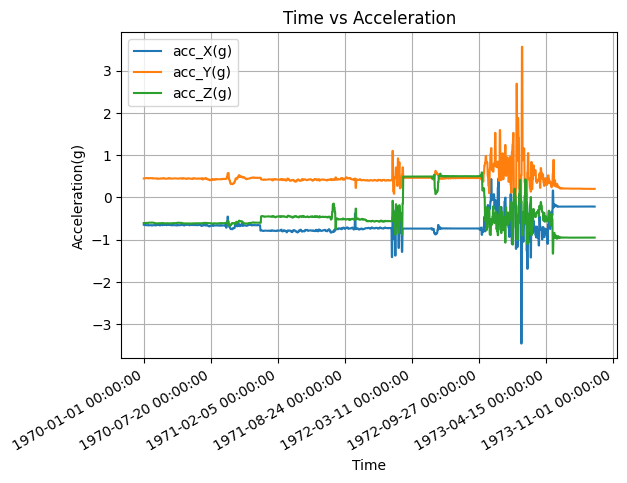

<Figure size 2000x500 with 0 Axes>

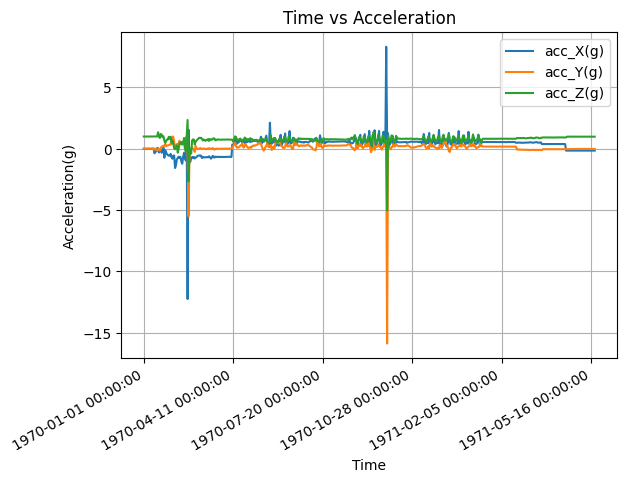

<Figure size 2000x500 with 0 Axes>

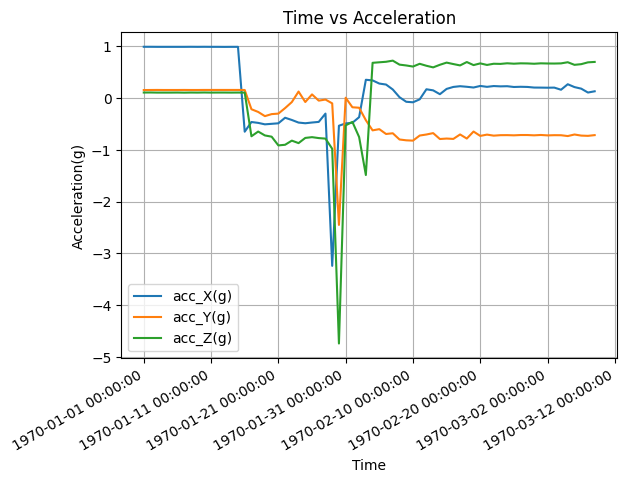

<Figure size 2000x500 with 0 Axes>

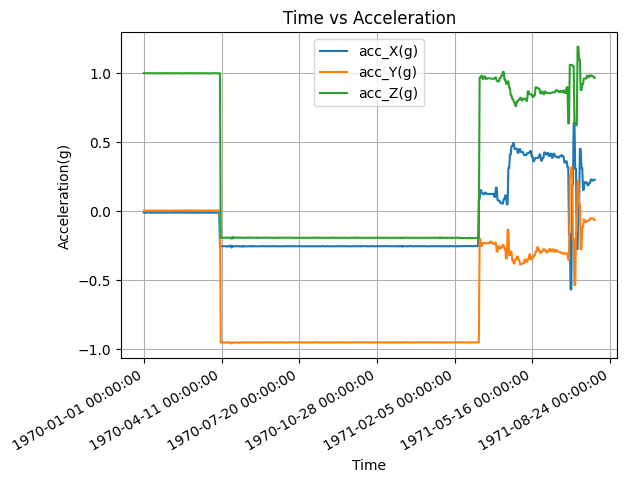

In [12]:
for filename, df in dfs.items():
    filename = filename[0:12]

    # Re-plotting
    plt.figure(figsize=(20, 5))

    df.plot(x='Time', y=['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)'], title=filename)
    plt.xlabel('Time')
    plt.ylabel('Acceleration(g)')

    # Improve date formatting on x-axis
    plt.gcf().autofmt_xdate() # Auto format for better date representation
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.title('Time vs Acceleration')
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')

# Re-plotting
plt.figure(figsize=(12, 6))

# Plotting each acceleration component
plt.plot(data['Time'], data['acc_X(g)'], label='acceleration X (g)')
plt.plot(data['Time'], data['acc_Y(g)'], label='acceleration Y (g)')
plt.plot(data['Time'], data['acc_Z(g)'], label='acceleration Z (g)')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Acceleration in g')
plt.title('Time vs Acceleration')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate() # Auto format for better date representation
myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)

# Show the plot
plt.show()